# Pymaceuticals Inc.
---

### Analysis

There is an outlier for a particular Mouse treated with the  Infubinol. This Mouse ID had the minimum timepoint  when compared with other Mouse ID's using the same Treatment which is considered as outliers

The Capomulin treatment shows that the Tumor volume decreased nearing final time points.

A correlation value of 0.84 close to 1  indicates a strong positive correlation between mouse weight and the average tumor volume for the Capomulin regimen.If the weight of the mouse increases the tumor volume increases or  the if the tumor volume is more there  is weight gain for that mouse. 

The Mean is less then Median for the  Drug Capomulin and Ramicane	which means the data points are negative and other Durgs show positive data points. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_df = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_study_df["Mouse ID"].unique()
len(mouse_count)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = mouse_study_df[mouse_study_df["Mouse ID"]=="g989"]
mouse_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_mouse_data_df = mouse_study_df[mouse_study_df["Mouse ID"]!="g989"]
clean_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = mouse_study_df[mouse_study_df["Mouse ID"]!="g989"]
clean_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice= clean_mouse_data_df["Mouse ID"].unique()
len(number_mice)

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Mean_Tumor_Volume = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
df_Mean_Tumor_Volume = pd.DataFrame({'Mean Tumor Volume':Mean_Tumor_Volume})
Median_Tumor_Volume = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
df_Median_Tumor_Volume = pd.DataFrame({'Median Tumor Volume':Median_Tumor_Volume})
Variance_Tumor_Volume = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
df_Variance_Tumor_Volume = pd.DataFrame({'	Tumor Volume Variance':Variance_Tumor_Volume})
SD_Tumor_Volume = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
df_SD_Tumor_Volume = pd.DataFrame({'Tumor Volume Std. Dev.':SD_Tumor_Volume})
SEM_Tumor_Volume = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
df_SEM_Tumor_Volume = pd.DataFrame({'Tumor Volume Std. Err.':SEM_Tumor_Volume})
Tumor_Volume_summary = df_Mean_Tumor_Volume.merge(df_Median_Tumor_Volume,on="Drug Regimen") \
                        .merge(df_Variance_Tumor_Volume,on="Drug Regimen").merge(df_SD_Tumor_Volume,on="Drug Regimen") \
                        .merge(df_SEM_Tumor_Volume,on="Drug Regimen")
Tumor_Volume_summary


,Mean Tumor Volume,Median Tumor Volume,\tTumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

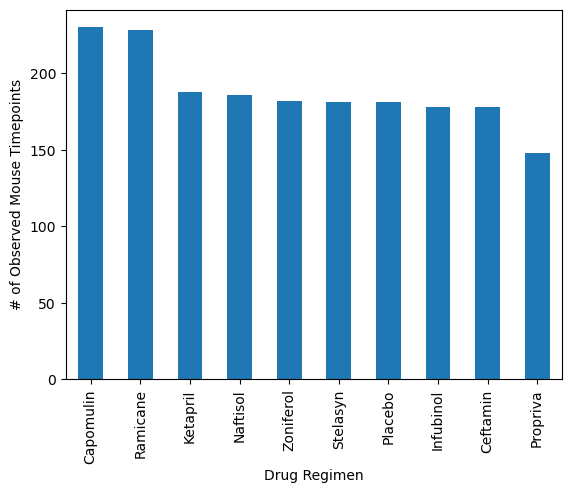

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen = clean_mouse_data_df.groupby("Drug Regimen").count()
Drug_Regimen

Drug_Count= Drug_Regimen.sort_values(by=["Timepoint","Drug Regimen"],ascending=False)

Drug_Count = Drug_Count["Timepoint"]

#Drug_Count= Drug_Count.sort_values(ascending=False)
Drug_Count.plot(kind="bar")

# Set a title for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

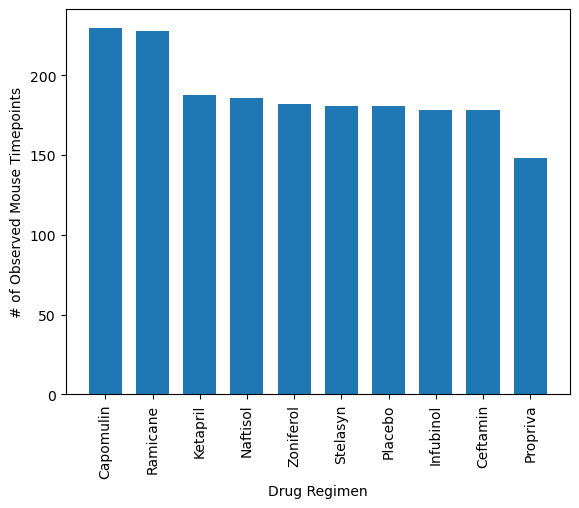

<Figure size 640x480 with 0 Axes>

In [12]:
Drug_Regimen = clean_mouse_data_df.groupby("Drug Regimen").count()

Drug_Count= Drug_Regimen.sort_values(by=["Timepoint","Drug Regimen"],ascending=False)
Drug_Count["Drug Regimen"]=Drug_Count.index
#Drug_Timepoint = Drug_Regimen.set_index("Drug Regimen")
plt.figure(figsize=(6.5,5))
plt.bar(Drug_Count["Drug Regimen"],Drug_Count["Timepoint"] , width=0.7)

# Set a title for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks( Drug_Count["Drug Regimen"], rotation="vertical")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'sex')

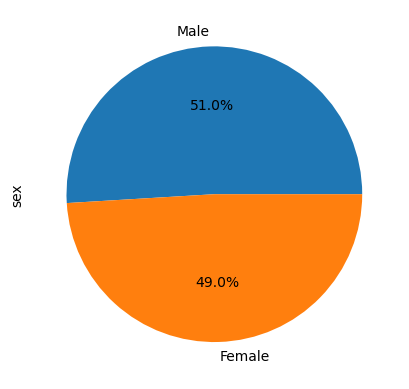

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

labels = ["Male","Female"]
Mice_sex_total = clean_mouse_data_df.groupby("Sex").value_counts()
Mice_sex = clean_mouse_data_df["Sex"].value_counts()
Mice_Male = (922/Mice_sex_total.count())*100
Mice_Female =  (958/Mice_sex_total.count())*100
merged = []
# The values of each section of the pie chart
sizes = [Mice_Female,Mice_Male]
for i in range(len(labels)):

    merged.append({'Sex': labels[i],'%': sizes[i]})
merged_df = pd.DataFrame(merged)
merged_df
# The colors of each section of the pie chart
#merged_df.plot(kind="pie",x="Sex",y="%")
merged_df.plot(kind="pie", y="%", labels=merged_df["Sex"], autopct='%1.1f%%',legend=False)

# Adding title
plt.ylabel("sex")
      

Text(0, 0.5, 'sex')

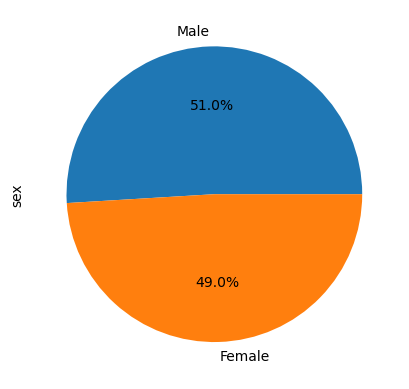

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male","Female"]
Mice_sex_total = clean_mouse_data_df.groupby("Sex").value_counts()
Mice_sex = clean_mouse_data_df["Sex"].value_counts()
Mice_Male = (922/Mice_sex_total.count())*100
Mice_Female =  (958/Mice_sex_total.count())*100

# The values of each section of the pie chart
sizes = [Mice_Female,Mice_Male]

# The colors of each section of the pie chart

plt.pie(sizes,  labels=labels,autopct="%1.1f%%")
plt.ylabel("sex")
      

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_data_df.groupby("Mouse ID")["Timepoint"].max()

max_timepoint_df =  pd.DataFrame({'Max Timepoint':max_timepoint})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint_df.merge(clean_mouse_data_df, on="Mouse ID")


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

Treatment_list =[ "Capomulin", "Ramicane", "Infubinol","Ceftamin"]

    # Create empty list to fill with tumor vol data (for plotting)

tumor_volume =[]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment in the Treatment_list
for treatment in Treatment_list:
    # Locate the rows which contain mice on each drug and get the final tumor volumes
    #final_tumor_volume = merged_df.loc[(merged_df["Drug Regimen"] == treatment & merged_df["Timepoint"] == merged_df["Max Timepoint"]) , "Tumor Volume (mm3)"]
    final_tumor_volume = merged_df.loc[(merged_df["Drug Regimen"] == treatment) &  (merged_df["Timepoint"] == merged_df["Max Timepoint"]),"Tumor Volume (mm3)"]
     # Add Subset
   

   
    # Add to list
    tumor_volume.append(final_tumor_volume.to_list())
    
    
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
                
        # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"{treatment}'s potential outliers : {outliers}")

 


Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

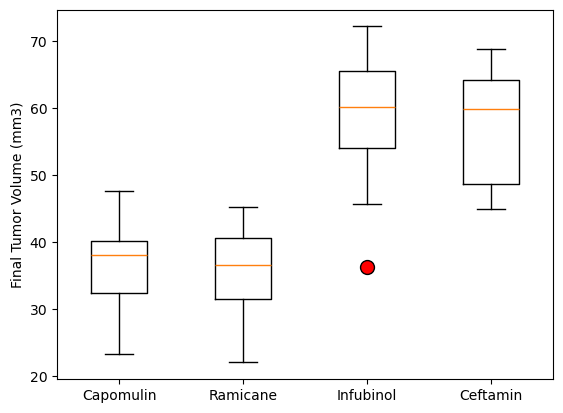

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Combine final tumor volumes with corresponding treatments
# Generate box plot
plt.figure(figsize=(10, 6))
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume,flierprops=dict(marker='o', markerfacecolor='r', markersize=10))
plt.xticks(range(1, len(Treatment_list) + 1), Treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.grid(True)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

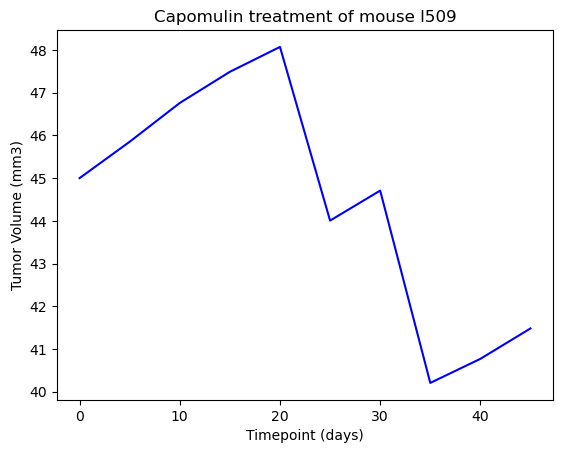

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

tumor_volume_line_plot = clean_mouse_data_df.loc[(clean_mouse_data_df["Mouse ID"]== "l509"),:]
plt.plot(tumor_volume_line_plot["Timepoint"],tumor_volume_line_plot["Tumor Volume (mm3)"],color="blue" )
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")


Text(0, 0.5, 'Average Tumor Volume(mm3)')

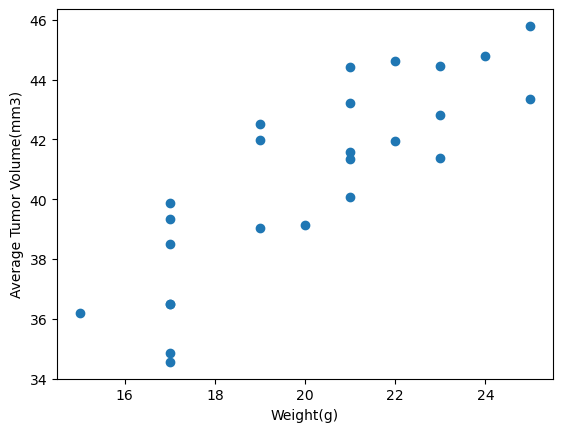

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Average_tumor_volume = clean_mouse_data_df.loc[(clean_mouse_data_df["Drug Regimen"]== "Capomulin"),:]
#Average_tumor_volume = Average_tumor_volume.groupby("Mouse ID")(" Weight(g)")["Tumor Volume (mm3)"].mean()
average_data = Average_tumor_volume.groupby("Mouse ID").agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
plt.scatter(average_data["Weight (g)"], average_data["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


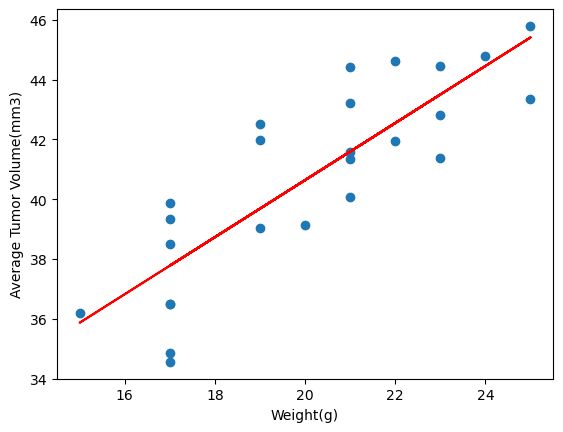

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = average_data.corr().loc["Weight (g)", "Tumor Volume (mm3)"]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
# Plot out rooms versus median house price
x_values = average_data["Weight (g)"]
y_values = average_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()